**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from torchvision.datasets import MNIST
#%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X = np.array(X).astype(float)
        self.y = np.array(y)
        self.classes = np.unique(y)
        if self.algorithm == 'kd_tree':
            self.kdtree = KDTree(self.X)
        return self

    def _predict(self, X):
        X = np.asarray(X).astype(float)
        if self.algorithm == 'brute':
            x1 = np.sum(np.square(X), axis=1).reshape(-1, 1)
            x2 = np.sum(np.square(self.X), axis=1).reshape(1, -1)
            D = np.sqrt(x1+x2-2*np.matmul(X, self.X.T))
            D = D.argpartition(self.n_neighbors)[:, :self.n_neighbors]
        else:
            dist, D = self.kdtree.query(X, k=self.n_neighbors)
        pred = self.y[np.ravel(D)].reshape(-1, self.n_neighbors)
        return pred

    def predict(self, X):
        return np.array([np.bincount(x).argmax() for x in
                        self._predict(X)])

    def predict_proba(self, X):
        return np.apply_along_axis(lambda x: np.bincount(x,
                                   minlength=self.classes.size) /
                                   self.n_neighbors, axis=1,
                                   arr=self._predict(X))

    def score(self, X, y):
        x = self.predict(X)
        mask_t = np.asarray(np.where(x == y))
        mask_f = np.asarray(np.where(x != y))
        return mask_t.shape[1] / (mask_t.shape[1] + mask_f.shape[1])


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm= 'brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 997 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

Wall time: 998 µs


array([0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1])

In [9]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1], dtype=int64)

In [10]:
%time clf.predict_proba(X_test)

Wall time: 997 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 998 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [14]:
scores = np.zeros(40)
for i in range(1, 41):
    avg_score = 0
    for j in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(
                                           iris.data,
                                           iris.target,
                                           test_size=0.1,
                                           stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        my_clf.predict(X_test)
        avg_score += my_clf.score(X_test, y_test)
    avg_score /= 1000
    scores[i-1] = avg_score
scores


array([0.95793333, 0.94693333, 0.96053333, 0.95693333, 0.9638    ,
       0.958     , 0.96573333, 0.96773333, 0.96886667, 0.97086667,
       0.97133333, 0.96526667, 0.9746    , 0.97173333, 0.97453333,
       0.97166667, 0.97506667, 0.969     , 0.97046667, 0.966     ,
       0.96426667, 0.9622    , 0.9654    , 0.9562    , 0.96153333,
       0.95053333, 0.95333333, 0.9462    , 0.95      , 0.95113333,
       0.95273333, 0.94766667, 0.94913333, 0.946     , 0.94773333,
       0.946     , 0.94546667, 0.94406667, 0.948     , 0.94633333])

In [15]:
K = np.argmax(scores)+1
K

17

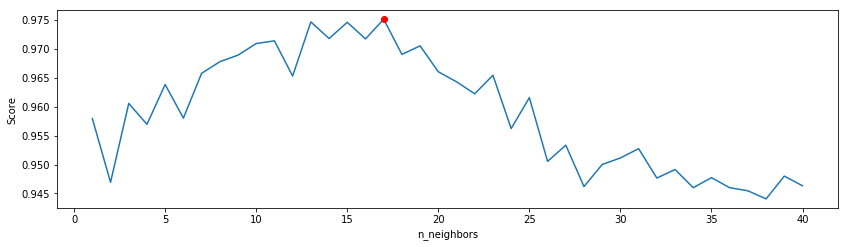

In [16]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(211)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('Score')
ax.plot(np.linspace(1, 40, 40), scores)
ax.plot(K, scores[K-1], 'ro')


**MNIST**

In [17]:
#mnist = fetch_mldata('MNIST original') mldata is down

In [18]:
warnings.filterwarnings('ignore')
m_l_tr = MNIST('.', train=True, download=True, transform=None)
X_1, y_1 = m_l_tr.train_data.numpy().reshape(60000, 784), m_l_tr.train_labels.numpy()
m_l_t = MNIST('.', train=False, download=True, transform=None)
X_2, y_2 = m_l_t.test_data.numpy().reshape(10000, 784), m_l_t.test_labels.numpy()
X = np.concatenate((X_1, X_2))
y = np.concatenate((y_1, y_2))
mnist = {'data': X, 'target': y}


9920512it [00:04, 2361921.79it/s]                                                                                      


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 83047.95it/s]                                                                                          


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:01, 1050460.73it/s]                                                                                      


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 31559.41it/s]                                                                                           


Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [19]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=0.01, stratify=mnist['target'])

In [20]:
clf = KNeighborsClassifier(n_neighbors=K)
my_clf = MyKNeighborsClassifier(n_neighbors=K)

In [21]:
%time clf.fit(X_train, y_train)

Wall time: 30.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [22]:
%time my_clf.fit(X_train, y_train)

Wall time: 222 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=17)

In [23]:
%time clf.predict(X_test)

Wall time: 1min 32s


array([8, 6, 7, 3, 7, 9, 8, 3, 7, 1, 1, 9, 1, 7, 6, 6, 2, 4, 5, 1, 4, 1,
       5, 4, 9, 7, 0, 3, 6, 6, 2, 5, 3, 0, 7, 2, 3, 7, 4, 2, 3, 2, 7, 1,
       7, 0, 8, 2, 4, 1, 3, 5, 1, 2, 6, 3, 0, 7, 6, 4, 8, 5, 9, 2, 4, 8,
       3, 0, 9, 1, 8, 5, 9, 0, 9, 7, 7, 4, 9, 0, 0, 5, 0, 7, 4, 5, 9, 7,
       4, 5, 7, 6, 2, 6, 3, 3, 5, 7, 9, 6, 8, 1, 2, 2, 6, 5, 8, 5, 1, 5,
       7, 6, 2, 1, 3, 5, 9, 5, 0, 6, 1, 9, 5, 8, 2, 3, 1, 8, 3, 7, 8, 2,
       0, 1, 7, 7, 7, 2, 3, 8, 4, 9, 0, 0, 8, 4, 6, 1, 7, 1, 3, 8, 1, 0,
       8, 4, 1, 1, 6, 2, 2, 6, 6, 6, 0, 5, 2, 7, 6, 0, 2, 6, 9, 4, 1, 5,
       2, 8, 8, 5, 9, 0, 6, 1, 3, 4, 7, 3, 0, 2, 3, 0, 3, 5, 3, 5, 6, 4,
       5, 8, 2, 8, 7, 7, 3, 7, 5, 6, 3, 9, 8, 9, 6, 4, 8, 1, 0, 0, 3, 5,
       1, 6, 3, 0, 5, 3, 1, 3, 5, 2, 8, 8, 2, 7, 1, 7, 7, 7, 1, 7, 7, 1,
       6, 4, 5, 9, 2, 2, 4, 3, 8, 0, 7, 6, 0, 3, 9, 0, 4, 4, 7, 9, 5, 9,
       1, 9, 8, 4, 6, 3, 4, 0, 1, 5, 7, 0, 0, 0, 2, 1, 8, 8, 8, 4, 3, 0,
       3, 3, 1, 5, 0, 0, 4, 3, 6, 2, 5, 4, 5, 9, 3,

In [24]:
%time my_clf.predict(X_test)

Wall time: 2.69 s


array([8, 6, 7, 3, 7, 9, 8, 3, 7, 1, 1, 9, 1, 7, 6, 6, 2, 4, 5, 1, 4, 1,
       5, 4, 9, 7, 0, 3, 6, 6, 2, 5, 3, 0, 7, 2, 3, 7, 4, 2, 3, 2, 7, 1,
       7, 0, 8, 2, 4, 1, 3, 5, 1, 2, 6, 3, 0, 7, 6, 4, 8, 5, 9, 2, 4, 8,
       3, 0, 9, 1, 8, 5, 9, 0, 9, 7, 7, 4, 9, 0, 0, 5, 0, 7, 4, 5, 9, 7,
       4, 5, 7, 6, 2, 6, 3, 3, 5, 7, 9, 6, 8, 1, 2, 2, 6, 5, 8, 5, 1, 5,
       7, 6, 2, 1, 3, 5, 9, 5, 0, 6, 1, 9, 5, 8, 2, 3, 1, 8, 3, 7, 8, 2,
       0, 1, 7, 7, 7, 2, 3, 8, 4, 9, 0, 0, 8, 4, 6, 1, 7, 1, 3, 8, 1, 0,
       8, 4, 1, 1, 6, 2, 2, 6, 6, 6, 0, 5, 2, 7, 6, 0, 2, 6, 9, 4, 1, 5,
       2, 8, 8, 5, 9, 0, 6, 1, 3, 4, 7, 3, 0, 2, 3, 0, 3, 5, 3, 5, 6, 4,
       5, 8, 2, 8, 7, 7, 3, 7, 5, 6, 3, 9, 8, 9, 6, 4, 8, 1, 0, 0, 3, 5,
       1, 6, 3, 0, 5, 3, 1, 3, 5, 2, 8, 8, 2, 7, 1, 7, 7, 7, 1, 7, 7, 1,
       6, 4, 5, 9, 2, 2, 4, 3, 8, 0, 7, 6, 0, 3, 9, 0, 4, 4, 7, 9, 5, 9,
       1, 9, 8, 4, 6, 3, 4, 0, 1, 5, 7, 0, 0, 0, 2, 1, 8, 8, 8, 4, 3, 0,
       3, 3, 1, 5, 0, 0, 4, 3, 6, 2, 5, 4, 5, 9, 3,

In [25]:
%time clf.predict_proba(X_test)

Wall time: 1min 32s


array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.76470588, 0.17647059, ..., 0.05882353, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
%time my_clf.predict_proba(X_test)

Wall time: 3.35 s


array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.76470588, 0.17647059, ..., 0.05882353, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
clf.score(X_test, y_test)

0.9571428571428572

In [28]:
my_clf.score(X_test, y_test)

0.9571428571428572

Задание 4

In [29]:
clf = KNeighborsClassifier(n_neighbors=K, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=K, algorithm='kd_tree')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=0.01, stratify=mnist['target'])

In [31]:
%time clf.fit(X_train, y_train)

Wall time: 29.9 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [32]:
%time my_clf.fit(X_train, y_train)

Wall time: 29.4 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=17)

In [33]:
%time clf.predict(X_test)

Wall time: 1min 32s


array([1, 6, 5, 1, 7, 9, 9, 5, 4, 2, 3, 5, 2, 1, 8, 3, 0, 2, 0, 3, 8, 0,
       3, 2, 6, 7, 6, 9, 6, 2, 3, 9, 5, 7, 0, 8, 2, 3, 5, 5, 7, 4, 3, 7,
       0, 4, 4, 8, 7, 4, 3, 0, 1, 0, 9, 4, 2, 1, 5, 3, 8, 8, 9, 7, 7, 5,
       5, 5, 3, 1, 8, 2, 3, 7, 0, 7, 0, 0, 9, 3, 8, 1, 3, 1, 8, 1, 3, 7,
       3, 1, 7, 0, 9, 5, 2, 0, 0, 0, 7, 1, 0, 9, 1, 1, 2, 0, 3, 6, 5, 3,
       8, 1, 8, 6, 0, 0, 9, 8, 1, 8, 0, 3, 4, 3, 0, 0, 0, 1, 6, 9, 2, 5,
       2, 6, 6, 6, 4, 7, 6, 3, 5, 3, 9, 0, 2, 0, 6, 9, 2, 8, 8, 0, 8, 5,
       6, 7, 2, 0, 2, 6, 7, 8, 7, 2, 0, 7, 7, 5, 3, 1, 8, 3, 6, 3, 1, 3,
       6, 6, 8, 1, 2, 6, 1, 9, 7, 7, 7, 0, 0, 0, 1, 3, 5, 6, 2, 1, 5, 2,
       1, 6, 3, 9, 2, 2, 1, 1, 4, 4, 7, 2, 9, 1, 1, 1, 3, 4, 5, 6, 8, 0,
       1, 6, 5, 8, 3, 9, 3, 1, 7, 0, 3, 4, 5, 9, 9, 0, 7, 1, 9, 8, 3, 4,
       2, 9, 8, 7, 3, 1, 7, 1, 7, 9, 4, 1, 8, 0, 7, 4, 2, 1, 9, 4, 2, 1,
       3, 4, 8, 8, 7, 3, 9, 9, 4, 4, 4, 5, 1, 0, 5, 1, 3, 7, 2, 5, 5, 3,
       3, 9, 4, 3, 6, 9, 6, 0, 9, 3, 7, 0, 2, 5, 0,

In [34]:
%time my_clf.predict(X_test)

Wall time: 1min 17s


array([1, 6, 5, 1, 7, 9, 9, 5, 4, 2, 3, 5, 2, 1, 8, 3, 0, 2, 0, 3, 8, 0,
       3, 2, 6, 7, 6, 9, 6, 2, 3, 9, 5, 7, 0, 8, 2, 3, 5, 5, 7, 4, 3, 7,
       0, 4, 4, 8, 7, 4, 3, 0, 1, 0, 9, 4, 2, 1, 5, 3, 8, 8, 9, 7, 7, 5,
       5, 5, 3, 1, 8, 2, 3, 7, 0, 7, 0, 0, 9, 3, 8, 1, 3, 1, 8, 1, 3, 7,
       3, 1, 7, 0, 9, 5, 2, 0, 0, 0, 7, 1, 0, 9, 1, 1, 2, 0, 3, 6, 5, 3,
       8, 1, 8, 6, 0, 0, 9, 8, 1, 8, 0, 3, 4, 3, 0, 0, 0, 1, 6, 9, 2, 5,
       2, 6, 6, 6, 4, 7, 6, 3, 5, 3, 9, 0, 2, 0, 6, 9, 2, 8, 8, 0, 8, 5,
       6, 7, 2, 0, 2, 6, 7, 8, 7, 2, 0, 7, 7, 5, 3, 1, 8, 3, 6, 3, 1, 3,
       6, 6, 8, 1, 2, 6, 1, 9, 7, 7, 7, 0, 0, 0, 1, 3, 5, 6, 2, 1, 5, 2,
       1, 6, 3, 9, 2, 2, 1, 1, 4, 4, 7, 2, 9, 1, 1, 1, 3, 4, 5, 6, 8, 0,
       1, 6, 5, 8, 3, 9, 3, 1, 7, 0, 3, 4, 5, 9, 9, 0, 7, 1, 9, 8, 3, 4,
       2, 9, 8, 7, 3, 1, 7, 1, 7, 9, 4, 1, 8, 0, 7, 4, 2, 1, 9, 4, 2, 1,
       3, 4, 8, 8, 7, 3, 9, 9, 4, 4, 4, 5, 1, 0, 5, 1, 3, 7, 2, 5, 5, 3,
       3, 9, 4, 3, 6, 9, 6, 0, 9, 3, 7, 0, 2, 5, 0,

In [35]:
%time clf.predict_proba(X_test)

Wall time: 1min 34s


array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05882353, 0.        , 0.        , ..., 0.        , 0.35294118,
        0.05882353],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 18s


array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05882353, 0.        , 0.        , ..., 0.        , 0.35294118,
        0.05882353],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
clf.score(X_test, y_test)

0.9585714285714285

In [38]:
my_clf.score(X_test, y_test)

0.9585714285714285

Задание 5

In [39]:
# seaborn - 
#    Основанная на matplotlib библиотека с высокоуровневым интерфейсом для визуализации статистических данных
# matplotlib - 
#    Библиотека для визуализации данных двумерной (2D) графикой (3D графика также поддерживается)
# train_test_split - 
#    Разбивает массивы или матрицы (рандомно) на обучающию и тестовую выборки
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) -
#    Позволяет объединить последовательность преобразований данных в один объект
# StandardScaler (from sklearn.preprocessing import StandardScaler) -
#    Преобразует данные таким образом, что mean=0 и std=1
# ClassifierMixin
#    Класс, в котором есть метод score(mean accuracy), к которому обращаются другие классификаторы из sklearn
# NeighborsBase
#    Базовый класс для knn-классификаторов
# KNeighborsMixin
#    Mixin класс, реализующий основные методы knn-классификаторов
# SupervisedIntegerMixin
#    Mixin класс, реализующий метод fit для NeighborsBase 